<a href="https://colab.research.google.com/github/SaamarthMeston/Capstone-Project-2---Rossmann-s-sales-prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting sales of a major store chain Rossmann**

Project type: Regression

Contribution : Solo

Project Summary
In this project, I received two csv files as an input and that is Rossmann Stores Data.csv and store.csv. I chose this project as all the companies in the world runns on sales, be it a service company or an product based company. 

#**Git Hub Link**

https://github.com/SaamarthMeston/Capstone-Project-2---Rossmann-s-sales-prediction

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#**Importing Libraries**

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **Loading dataset**

Mounting The  google Drive

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Data Sets and Creating Pandas Data Frames

In [174]:
Path1 = "/content/drive/MyDrive/Capstone Project-2 (Rossmann Retail Sales Prediction) /Data & Resource/Rossmann Stores Data.csv"
Path2 = "/content/drive/MyDrive/Capstone Project-2 (Rossmann Retail Sales Prediction) /Data & Resource/store.csv"

In [175]:
Rossmann_df = pd.read_csv(Path1)
Store_df = pd.read_csv(Path2)

# **Data Exploration**

Rossmann Dataframe

In [176]:
Rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [177]:
Rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [178]:
Rossmann_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


The Rossmann DataSet contains 1017209 rows and 9 Features with Store, DayofWeek, Customers, Open, Promo and SchoolHoliday being Intiger type and Date and StateHoliday being Object type

In [179]:
Rossmann_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [180]:
Rossmann_df['StateHoliday'][Rossmann_df['StateHoliday']== 0] = '0'

Store Data Frame

In [181]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [182]:
Store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


The Store DataSet contains 1115 rows and 10 Features with store and Promo2 being Intiger type, CompetitionDistance, CompetitionOpenSinceMonth,	CompetitionOpenSinceYear being Float Type and StoreType,	Assortment, PromoInterval being Object Type. 


# **Looking for NULL/NAN values**

looking for Null values in Rossmann Dataset.

In [183]:
Rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Looking for Null Values in Store Dataset.

In [184]:
Store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many Null values in **CompetitionOpenSinceMonth** ,**CompetitionOpenSinceYear**, **Promo2SinceWeek**, **Promo2SinceYear**, **Promo2SinceYear** and 3 Null values in **CompetitionDistance**.

# **Data Cleaning(imputing the missing values and changing the dataTypes)**


CompetitionDistance


In [185]:
Store_df[Store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


We will fill NAN values of CompetitionDistance with zero as this means they dont have a competetior in their vicinity and thus CompetitionOpenSinceMonth	CompetitionOpenSinceYear NAN values related to these rows should alos be Zero.

In [186]:
Store_df['CompetitionDistance'].fillna(value= 0, inplace=True)

In [187]:
Store_df['CompetitionDistance'] = Store_df['CompetitionDistance'].astype(int,copy =  False)

In [188]:
Store_df[Store_df['CompetitionDistance'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,0,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,0,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Filling the NAN Values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear with their respective mode

In [189]:
Store_df['CompetitionOpenSinceMonth'].mode()

0    9.0
Name: CompetitionOpenSinceMonth, dtype: float64

In [190]:
Store_df['CompetitionOpenSinceYear'].mode().astype(int)

0    2013
Name: CompetitionOpenSinceYear, dtype: int64

In [191]:
Store_df['CompetitionOpenSinceMonth'].fillna(9 ,inplace= True)

In [192]:
Store_df['CompetitionOpenSinceYear'].fillna(2013, inplace=True)

In [193]:
Store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [194]:
Store_df['CompetitionOpenSinceMonth'] = Store_df['CompetitionOpenSinceMonth'].astype(int,copy =  False)
Store_df['CompetitionOpenSinceYear'] = Store_df['CompetitionOpenSinceYear'].astype(int,copy =  False)

In [195]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   int64  
 4   CompetitionOpenSinceMonth  1115 non-null   int64  
 5   CompetitionOpenSinceYear   1115 non-null   int64  
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 87.2+ KB


In [196]:
Store_df['CompetitionOpenSinceMonth'][Store_df['CompetitionDistance'] == 0] = 0

In [197]:
Store_df['CompetitionOpenSinceYear'][Store_df['CompetitionDistance'] == 0] = 0

In [198]:
Store_df[Store_df['CompetitionDistance'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,0,0,0,0,NaN,NaN,NaN
621,622,a,c,0,0,0,0,NaN,NaN,NaN
878,879,d,a,0,0,0,1,5.0,2013.0,"Feb,May,Aug,Nov"


Filling values of Promo2SinceWeek Promo2SinceYear PromoInterval where Promo2 is 0 equal to 0


In [199]:
Store_df['Promo2SinceWeek'][Store_df['Promo2'] == 0] = 0

In [200]:
Store_df['Promo2SinceYear'][Store_df['Promo2'] == 0] = 0

In [201]:
Store_df['PromoInterval'][Store_df['Promo2'] == 0] = 0

In [202]:
Store_df['Promo2SinceWeek'] = Store_df['Promo2SinceWeek'].astype(int,copy= False)

In [203]:
Store_df['Promo2SinceYear'] = Store_df['Promo2SinceYear'].astype(int,copy= False)

In [204]:
Rossmann_df['Date'] = pd.to_datetime(Rossmann_df['Date'], format= '%Y-%m-%d')

In [205]:
Rossmann_df['Year'] = Rossmann_df['Date'].dt.strftime('%Y')

In [206]:
Rossmann_df['Month'] = Rossmann_df['Date'].dt.strftime('%m')

In [207]:
Rossmann_df['Date'] = Rossmann_df['Date'].dt.strftime('%d')

In [208]:
Rossmann_df['Year'] = Rossmann_df['Year'].astype(int,copy= False)
Rossmann_df['Month'] = Rossmann_df['Month'].astype(int,copy= False)
Rossmann_df['Date'] = Rossmann_df['Date'].astype(int,copy= False)

In [209]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Store                      1115 non-null   int64 
 1   StoreType                  1115 non-null   object
 2   Assortment                 1115 non-null   object
 3   CompetitionDistance        1115 non-null   int64 
 4   CompetitionOpenSinceMonth  1115 non-null   int64 
 5   CompetitionOpenSinceYear   1115 non-null   int64 
 6   Promo2                     1115 non-null   int64 
 7   Promo2SinceWeek            1115 non-null   int64 
 8   Promo2SinceYear            1115 non-null   int64 
 9   PromoInterval              1115 non-null   object
dtypes: int64(7), object(3)
memory usage: 87.2+ KB


In [210]:
Rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  int64 
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
 9   Year           1017209 non-null  int64 
 10  Month          1017209 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 85.4+ MB


In [211]:
Store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# **Mearging the Two Datasets together**

Mearging the data sets i.e Rossmann_df and Store_df to form a single data frame for further analysis

In [212]:
Full_Df = pd.merge(Rossmann_df, Store_df, on = 'Store', how = 'left')
Full_Df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31,5263,555,1,1,0,1,2015,7,c,a,1270,9,2008,0,0,0,0
1,2,5,31,6064,625,1,1,0,1,2015,7,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,31,8314,821,1,1,0,1,2015,7,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,31,13995,1498,1,1,0,1,2015,7,c,c,620,9,2009,0,0,0,0
4,5,5,31,4822,559,1,1,0,1,2015,7,a,a,29910,4,2015,0,0,0,0


In [213]:
Full_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017209 non-null  int64 
 1   DayOfWeek                  1017209 non-null  int64 
 2   Date                       1017209 non-null  int64 
 3   Sales                      1017209 non-null  int64 
 4   Customers                  1017209 non-null  int64 
 5   Open                       1017209 non-null  int64 
 6   Promo                      1017209 non-null  int64 
 7   StateHoliday               1017209 non-null  object
 8   SchoolHoliday              1017209 non-null  int64 
 9   Year                       1017209 non-null  int64 
 10  Month                      1017209 non-null  int64 
 11  StoreType                  1017209 non-null  object
 12  Assortment                 1017209 non-null  object
 13  CompetitionDistance        

In [214]:
Full_Df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Conceting the date column to datetime format and extracting Date Month and Year for forming new columns 

In [215]:
Full_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017209 non-null  int64 
 1   DayOfWeek                  1017209 non-null  int64 
 2   Date                       1017209 non-null  int64 
 3   Sales                      1017209 non-null  int64 
 4   Customers                  1017209 non-null  int64 
 5   Open                       1017209 non-null  int64 
 6   Promo                      1017209 non-null  int64 
 7   StateHoliday               1017209 non-null  object
 8   SchoolHoliday              1017209 non-null  int64 
 9   Year                       1017209 non-null  int64 
 10  Month                      1017209 non-null  int64 
 11  StoreType                  1017209 non-null  object
 12  Assortment                 1017209 non-null  object
 13  CompetitionDistance        

In [216]:
Full_Df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [217]:
Full_Df = Full_Df[['Store', 'DayOfWeek', 'Date', 'Month', 'Year', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval','Sales']]

In [218]:
Full_Df.head()

,Store,DayOfWeek,Date,Month,Year,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,1,5,31,7,2015,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0,5263
1,2,5,31,7,2015,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",6064
2,3,5,31,7,2015,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",8314
3,4,5,31,7,2015,1498,1,1,0,1,c,c,620,9,2009,0,0,0,0,13995
4,5,5,31,7,2015,559,1,1,0,1,a,a,29910,4,2015,0,0,0,0,4822


# **EXPLORITARY DATA ANALYSIS**

In [ ]:
Full_Df.describe().columns

Index(['Store', 'DayOfWeek', 'Date', 'Month', 'Year', 'Customers', 'Open',
       'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Sales'],
      dtype='object')

In [ ]:
Full_Df['Sales'].max()

41551

In [165]:
Full_Df['Sales'].mean()

6501.114500073145

In [166]:
Full_Df['Sales'].median()

6190.0

In [ ]:
Full_Df['Sales'][Full_Df['Sales'] == 0].value_counts()

0    172871
Name: Sales, dtype: int64

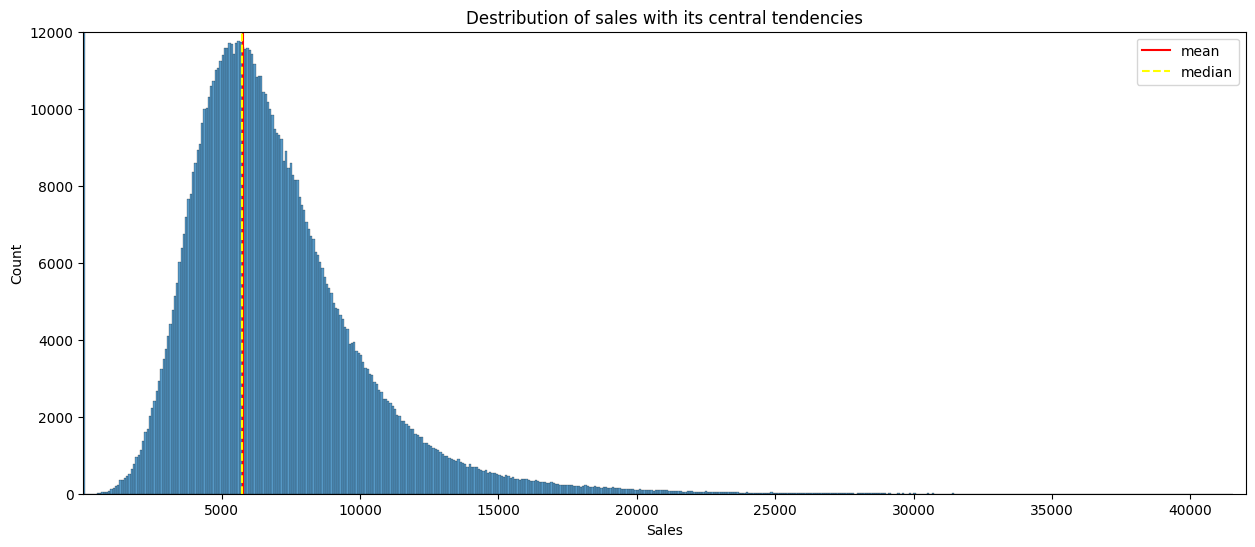

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(Full_Df, x ='Sales')
plt.xlim(1,42000)
plt.ylim(0,12000)
x=plt.axvline(Full_Df['Sales'].mean(), color = 'red')
x2=plt.axvline(Full_Df['Sales'].median(), color = 'yellow',ls= '--')
plt.title('Destribution of sales with its central tendencies')
plt.legend(handles =[x,x2],labels= ['mean','median'])
plt.show()

We can see that the sales column is heavily postive.

the average sales comes around 6501

with max 41551 Dollors of sales


<Axes: xlabel='Sales'>

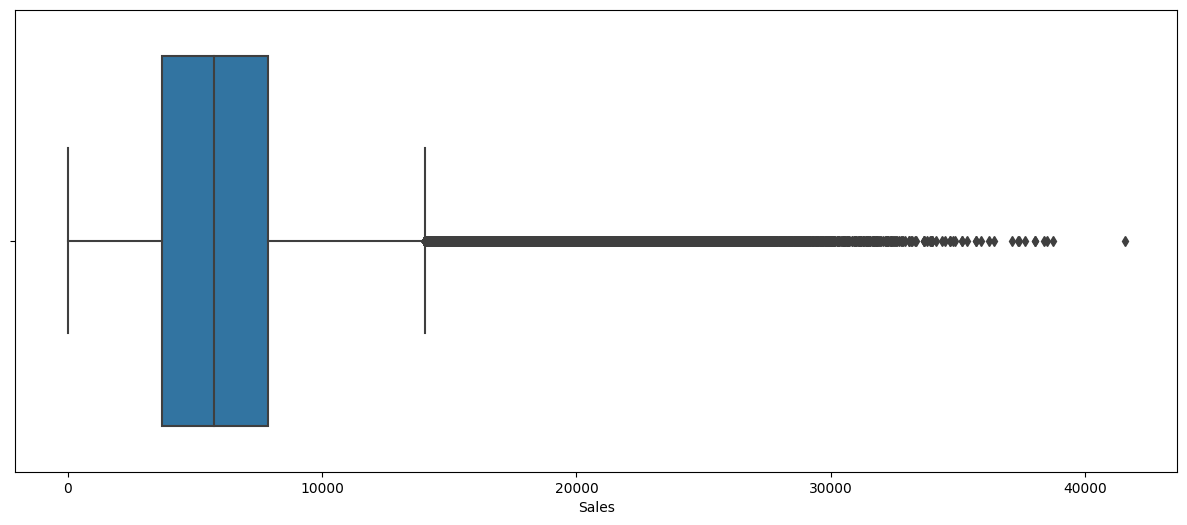

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(Full_Df,x='Sales')

There are many Outliers in Sale column, we have to remove them.

In [168]:
Full_Df['Customers'].mean()

699.5820022152405

(0.0, 15000.0)

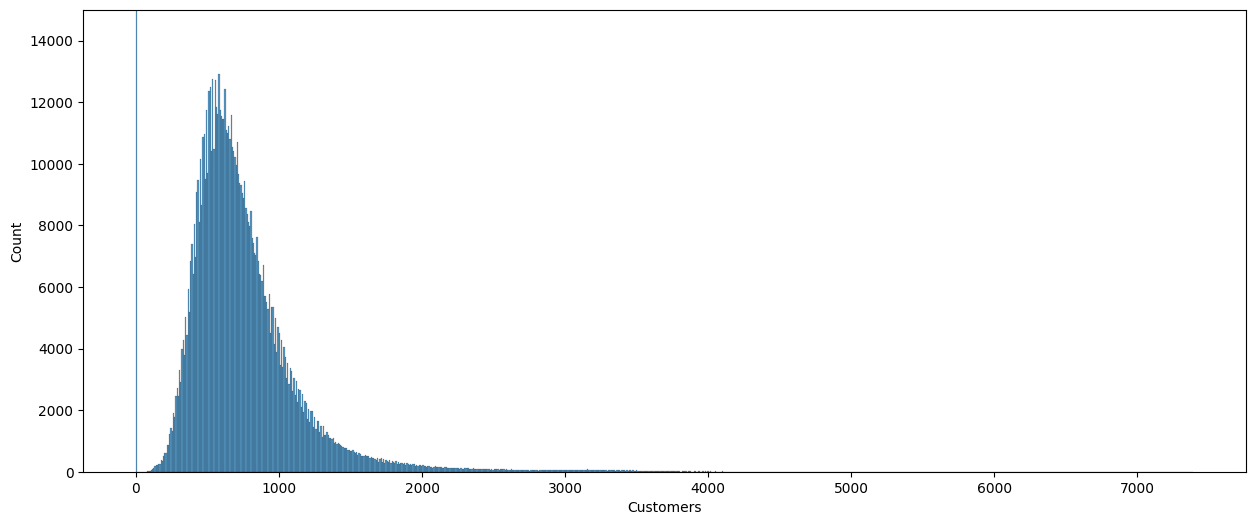

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(Full_Df,x ='Customers')
plt.ylim (0,15000)

The Customers too is highly skewed
averaging around 700. A store can expect on average of 700 customers on a given day

<Axes: xlabel='Customers'>

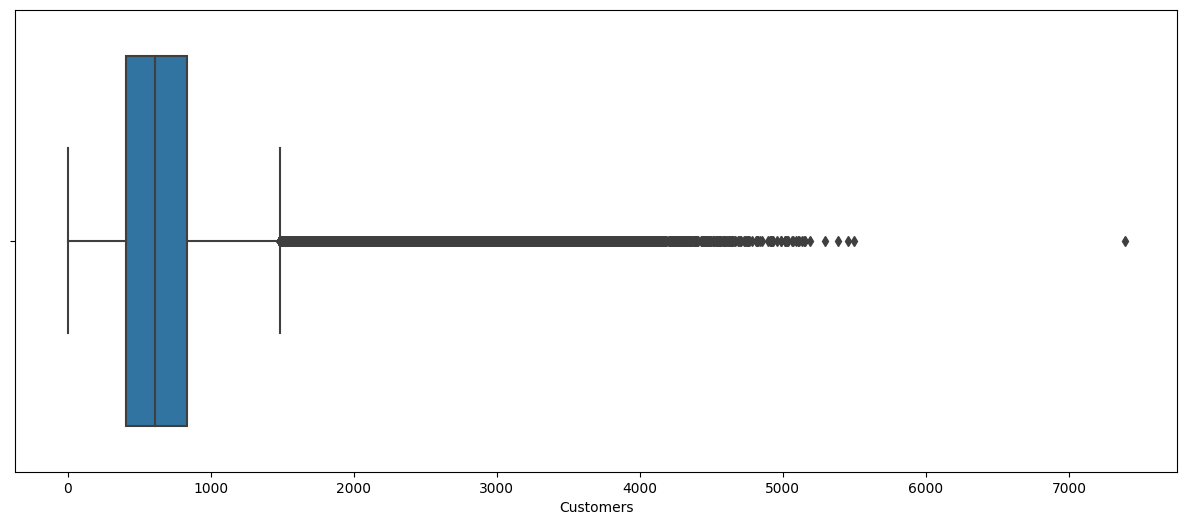

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(Full_Df,x='Customers')

The Customers column Contains many Outliers

**Assortment**

*  a = basic
*  b = extra
*  c = extended


<Axes: xlabel='Assortment', ylabel='Count'>

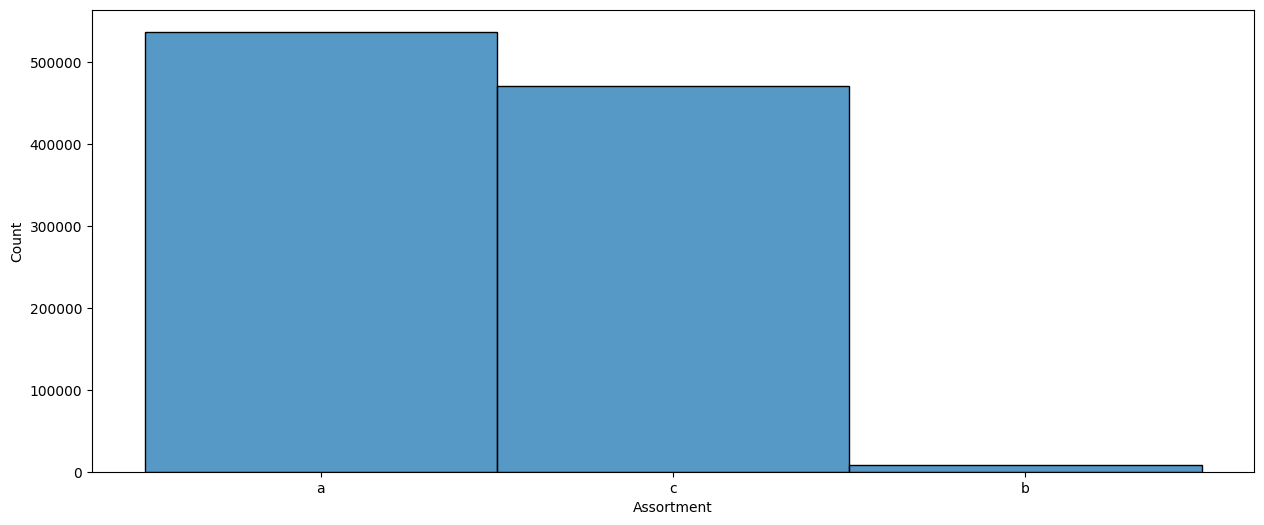

In [226]:
plt.figure(figsize=(15,6))
sns.histplot(Full_Df,x ='Assortment')

Stores having B assortment are very less as compared to C and A with A being the highest.

<Axes: xlabel='Assortment', ylabel='Sales'>

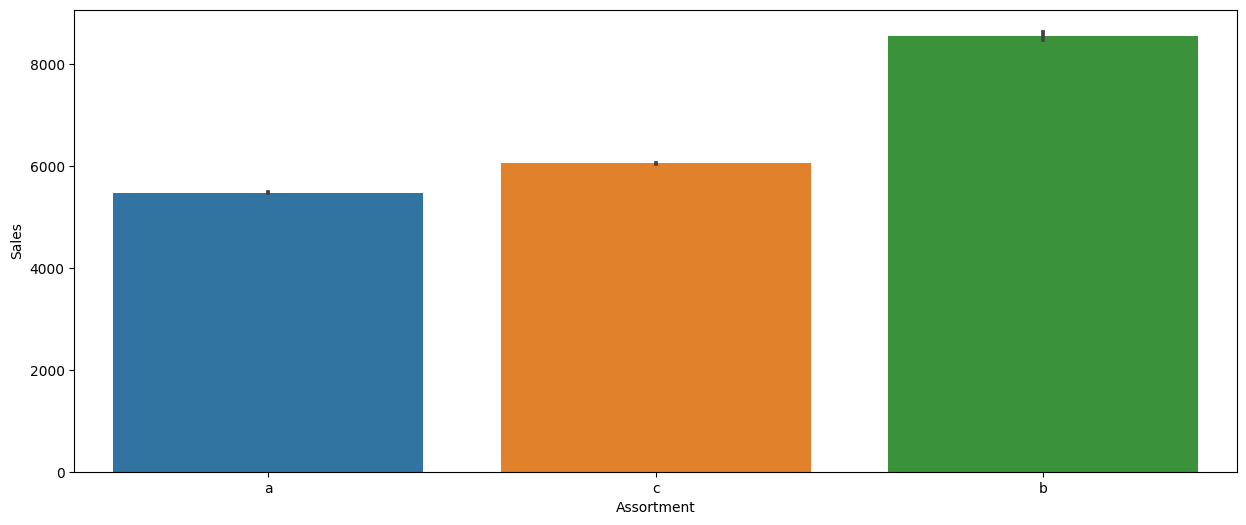

In [224]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df,x ='Assortment',y = 'Sales')

<Axes: xlabel='Assortment', ylabel='Customers'>

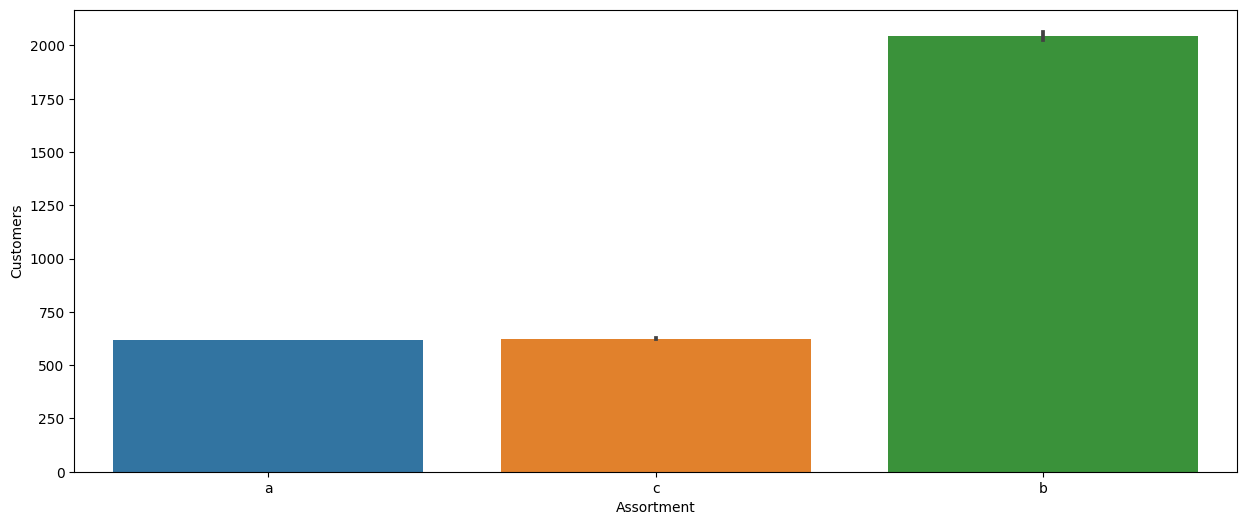

In [225]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df,x ='Assortment',y = 'Customers')

Assortment B despite being a very little fraction of the Assortment Types pulls the hightest sales and Customers.

Assortment B contains the most expensive and in demand itemns

Assortment A and C pulls the same amount of customers but C has more sales than A

<Axes: xlabel='StoreType', ylabel='Count'>

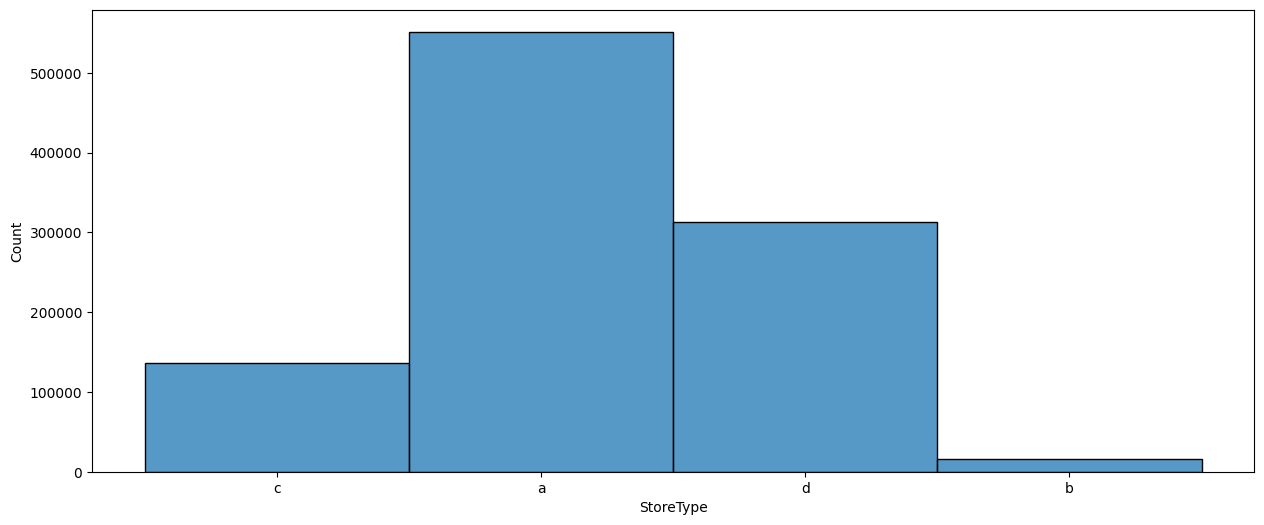

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(Full_Df,x ='StoreType')

Store type 'a' is the most common type followed by 'd','c' and 'b'. respectively

<Axes: xlabel='StoreType', ylabel='Sales'>

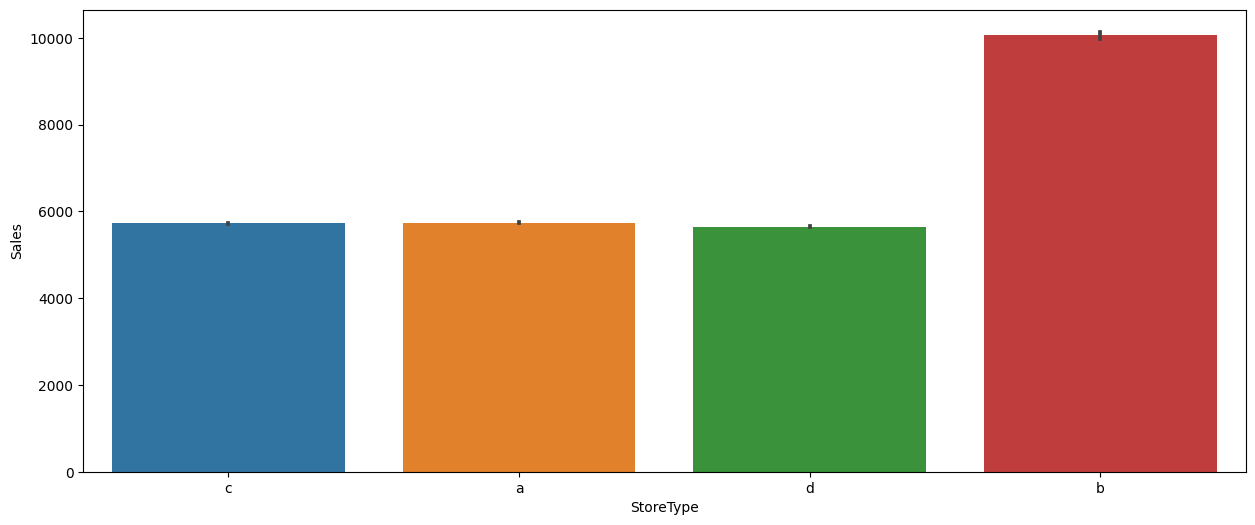

In [227]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df,x ='StoreType',y = 'Sales')

<Axes: xlabel='StoreType', ylabel='Sales'>

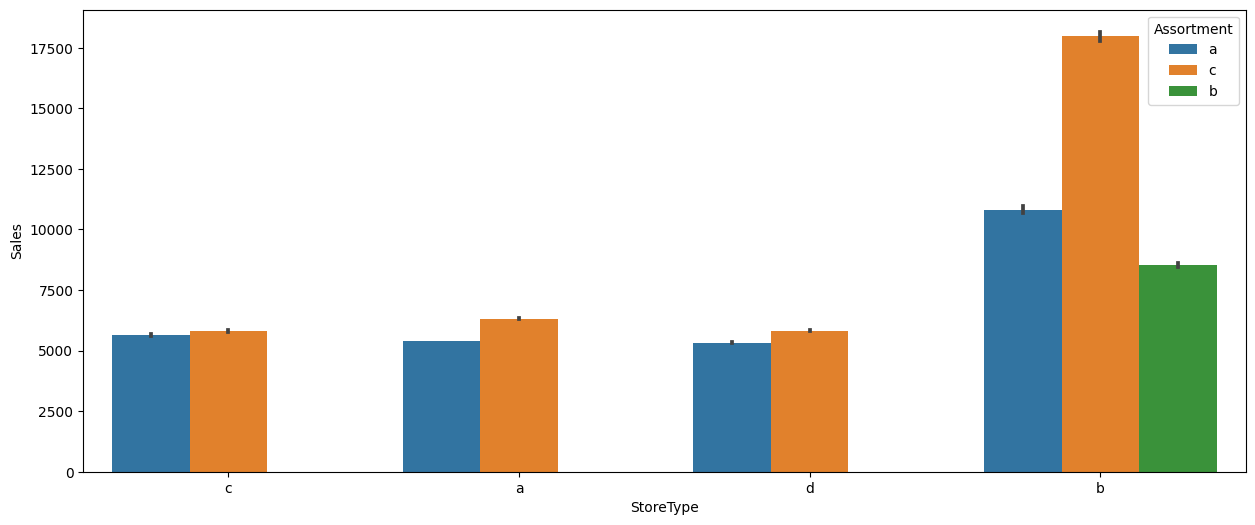

In [223]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df,x ='StoreType',y = 'Sales', hue ='Assortment')

Store Type 'b'  despite being the least amongst all the other type of Stores produces the most sales, it is the only store which have b(extra) type assortment.

<Axes: xlabel='StoreType', ylabel='Customers'>

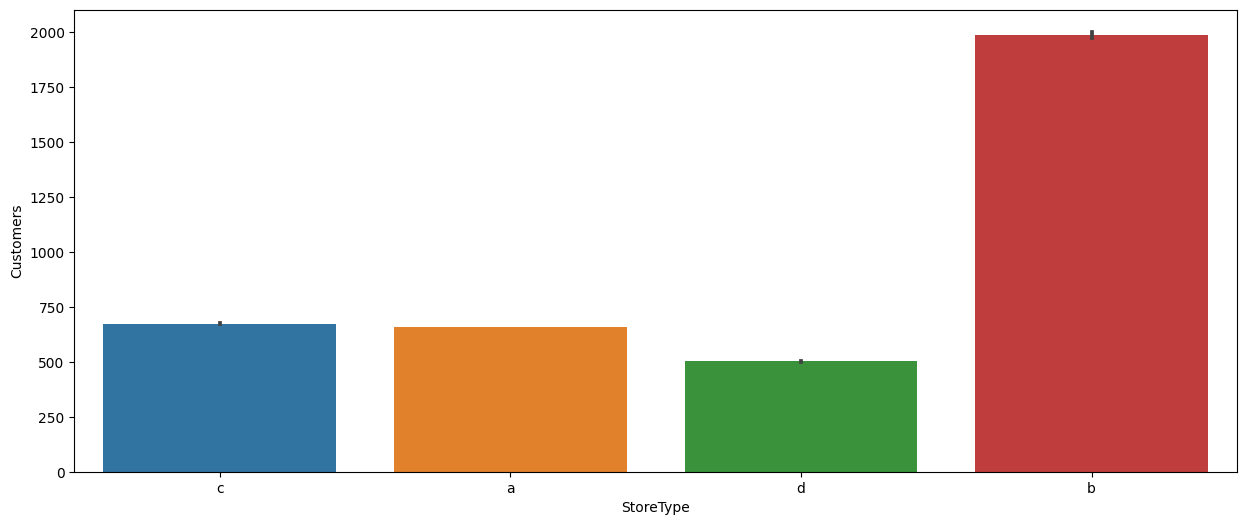

In [228]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df,x ='StoreType',y = 'Customers')

<Axes: xlabel='StoreType', ylabel='Customers'>

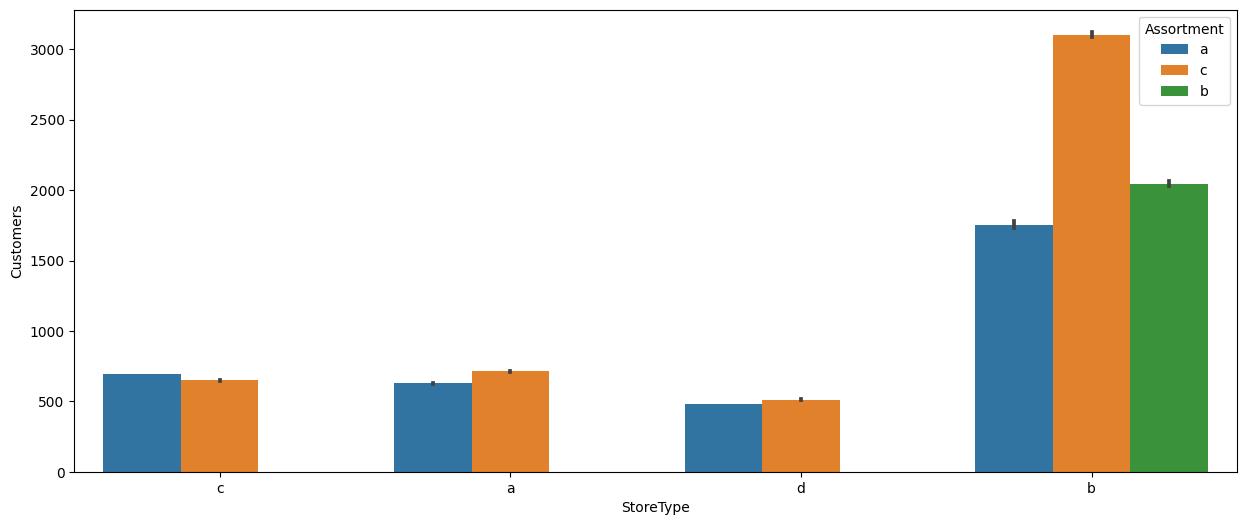

In [222]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df,x ='StoreType',y = 'Customers', hue = 'Assortment')

Store Type 'b' despite being the least amongst all the other type of Stores attract the most customers

Store Type B is in th most demand

<Axes: xlabel='Open', ylabel='count'>

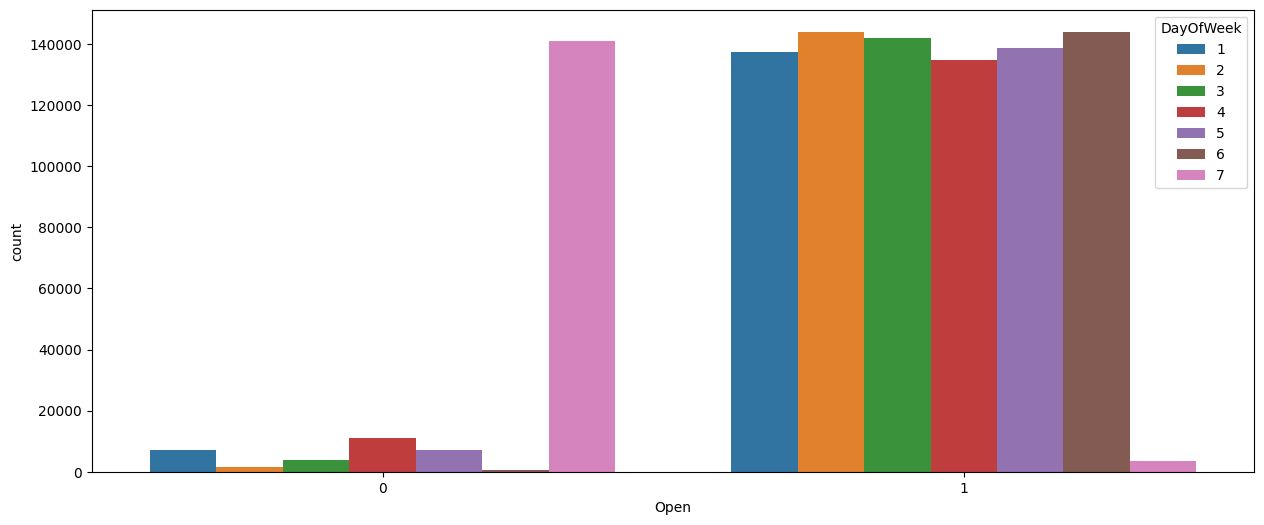

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(Full_Df,x ='Open', hue= 'DayOfWeek')

Stores are mostly Closed on the 7th day of the week i.e Sunday

<Axes: xlabel='CompetitionDistance', ylabel='Count'>

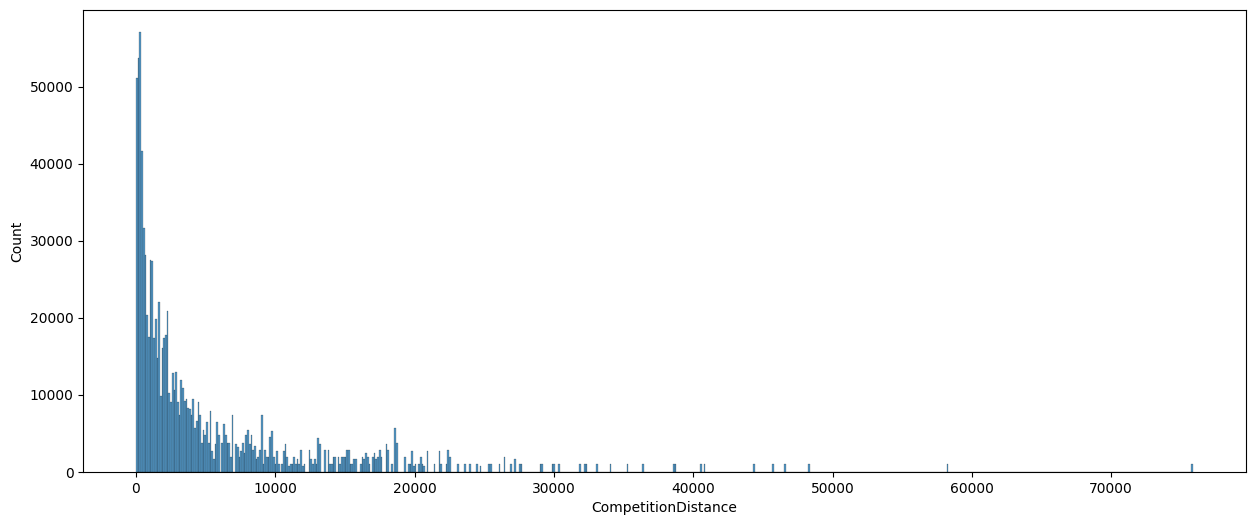

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(Full_Df,x ='CompetitionDistance')

<Axes: xlabel='CompetitionDistance'>

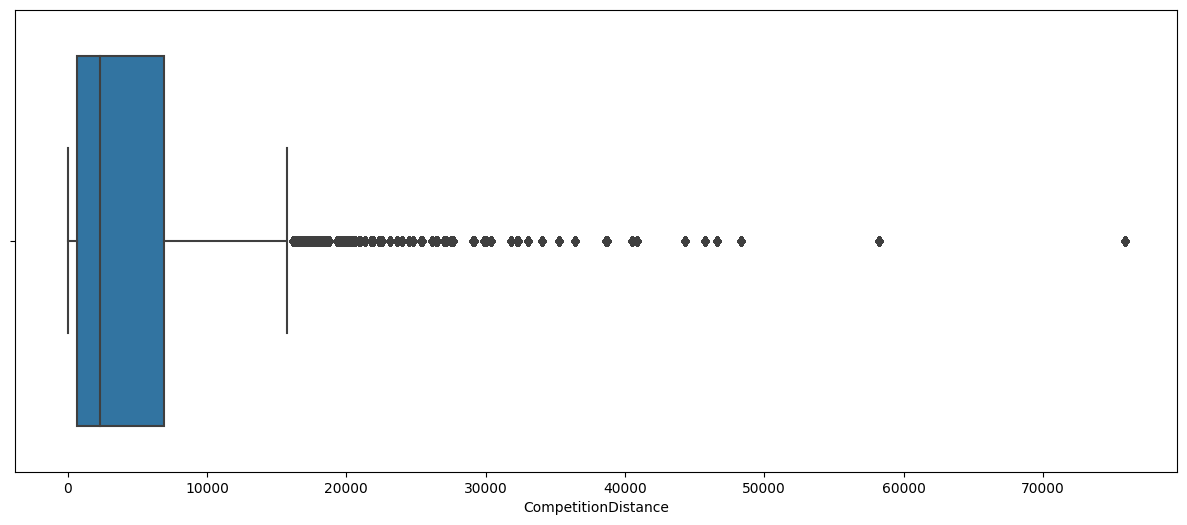

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(Full_Df,x ='CompetitionDistance')

CompetitionDistance is highly skewed and contains a lot of outliers

Text(0.5, 1.0, 'Plot between Sales and Customers')

<Figure size 1500x600 with 0 Axes>

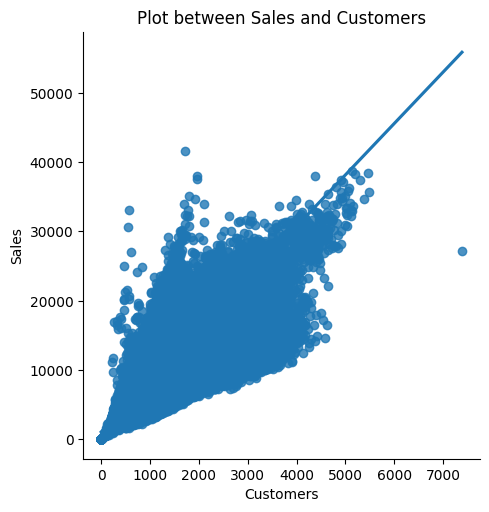

In [ ]:
plt.figure(figsize=(15,6))
sns.lmplot(x= 'Customers', y= 'Sales', data=Full_Df)
plt.title('Plot between Sales and Customers')

We can see a linear trend between Customers and Sales, i.e with one increasing other increases

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

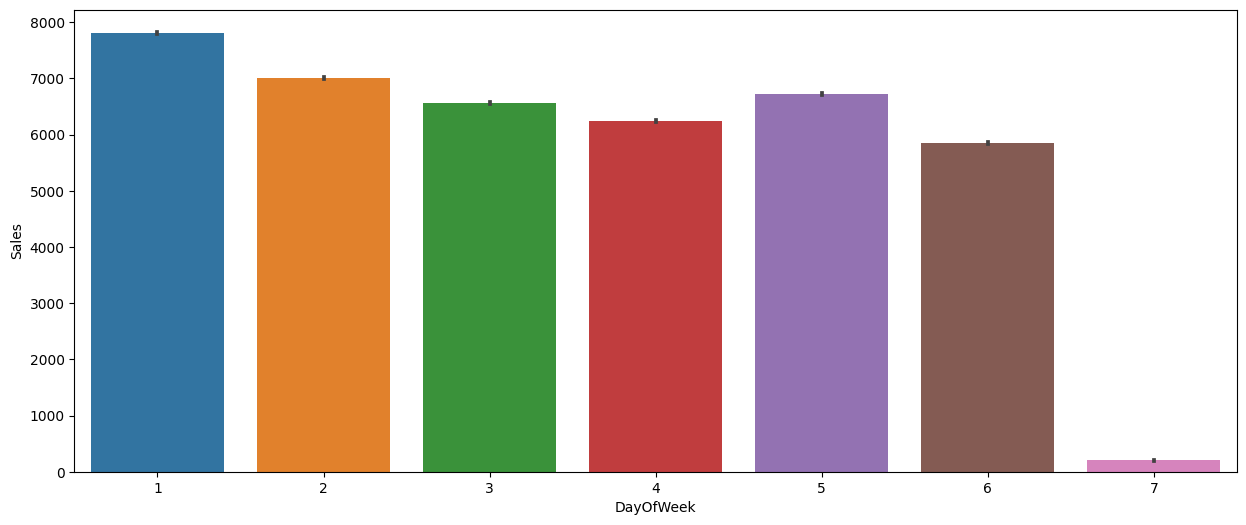

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df, x ='DayOfWeek', y= 'Sales')

There are alomst no sales on sunday as most of the stores are closed.
Mondays have the most the most sales then the sales decline with a increase on friday being the second highest.

<Axes: xlabel='DayOfWeek', ylabel='Customers'>

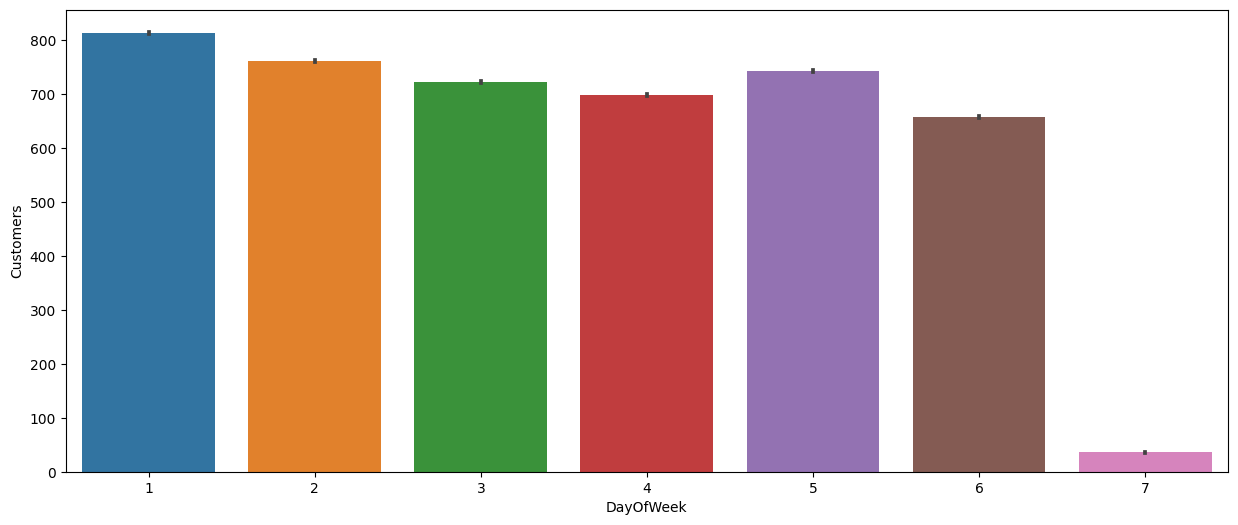

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df, x ='DayOfWeek', y= 'Customers')

There are alomst no Customers on sunday as most of the stores are closed
Mondays have the most the most Customers then the sales decline with a increase on friday being the second highest.

<Axes: xlabel='Year', ylabel='Sales'>

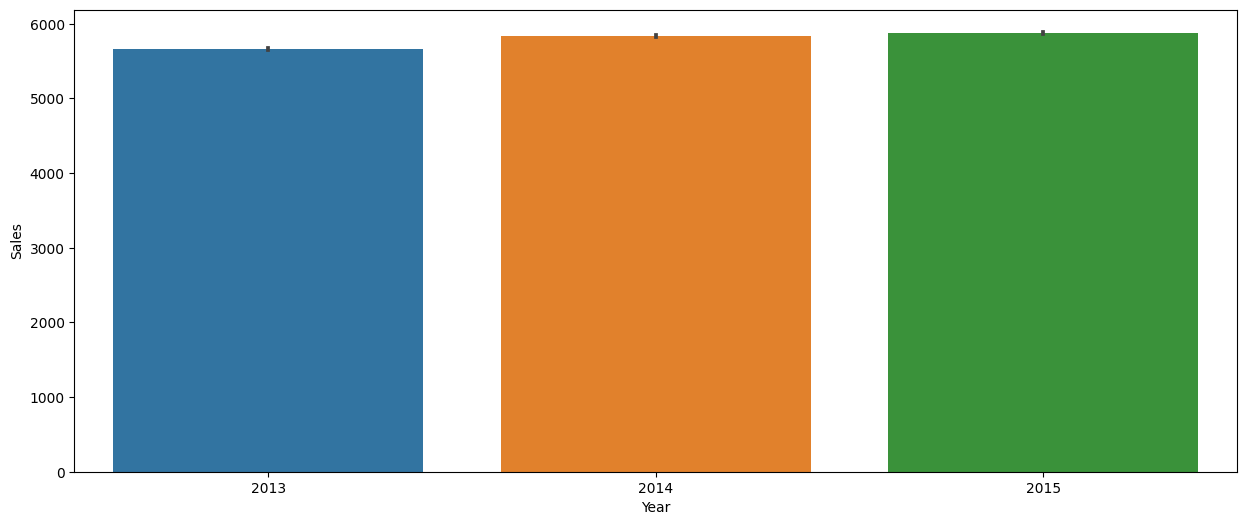

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df, x ='Year', y= 'Sales')

The YOY sales is alomst linear and slightly increasing

<Axes: xlabel='Month', ylabel='Sales'>

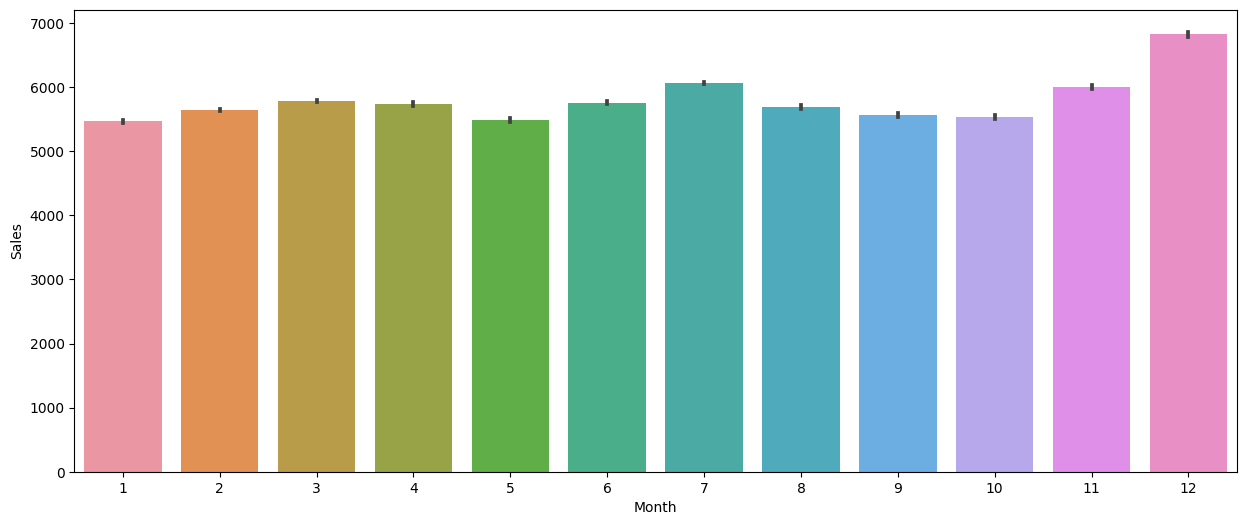

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df, x ='Month',y ='Sales')

We can see some seasionality with the Months as sales dip in monsoon and start in increasing from automn and peaks in winters at Festival times.

<Axes: xlabel='Date', ylabel='Sales'>

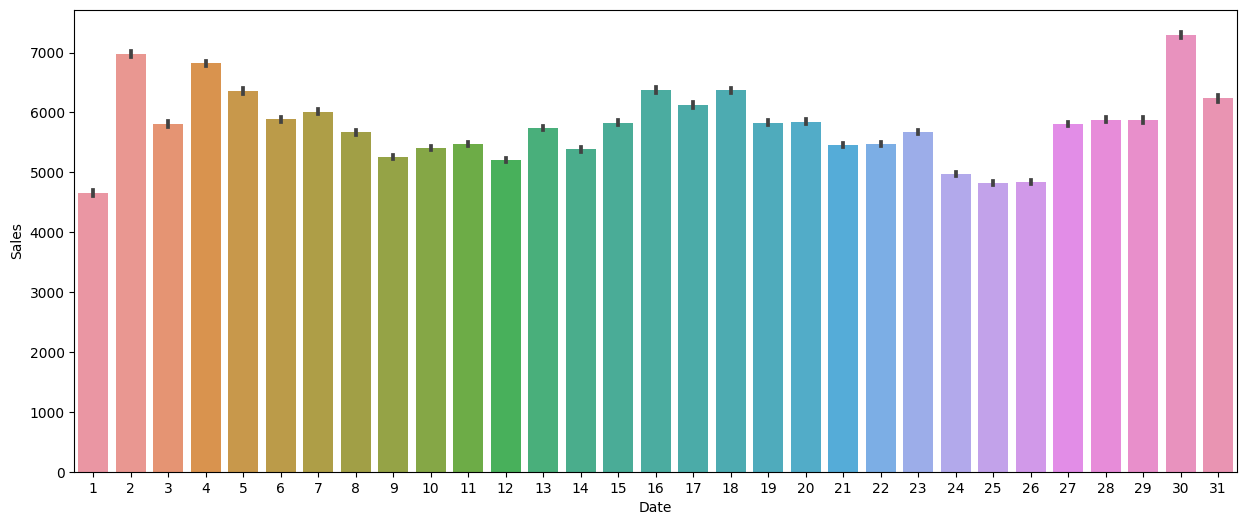

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df, x='Date',y ='Sales')

We can see a cyclical trend with the Dates as it forms awave like trend with sales, every alternate week the trend si the same. peak followed by a dip.

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

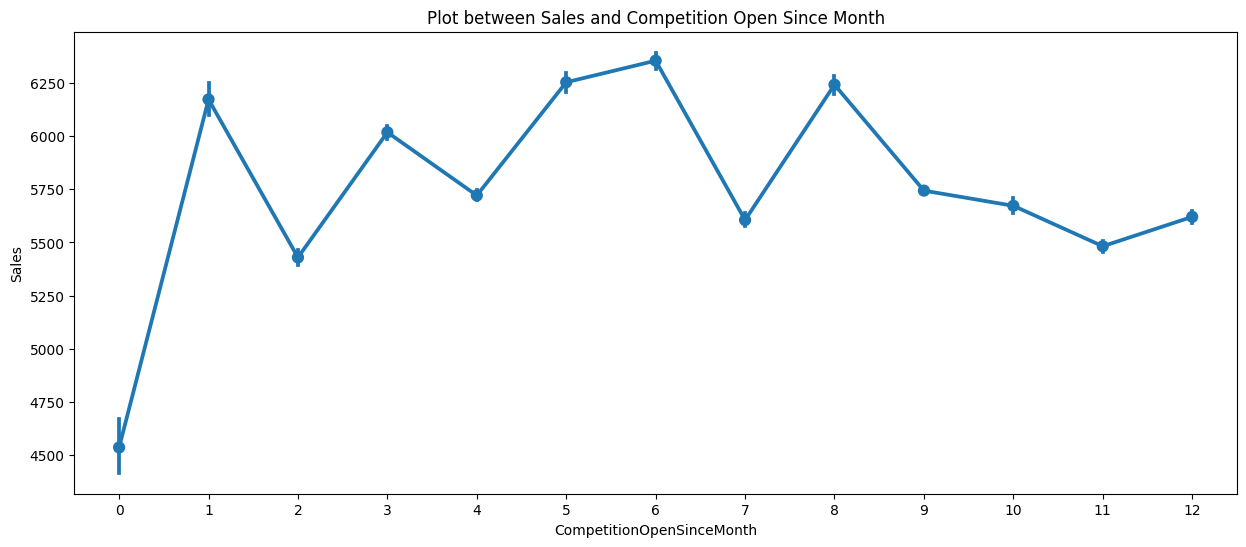

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=Full_Df)
plt.title('Plot between Sales and Competition Open Since Month')

Plot between Competition open since month and Sales explains the sales data in each month of a year. the sales drop when a copteting store opens op which is visible in 1st month data, over the next 5 months the sales increases peaking in the 6th moth then it starts converging to the mean. 

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

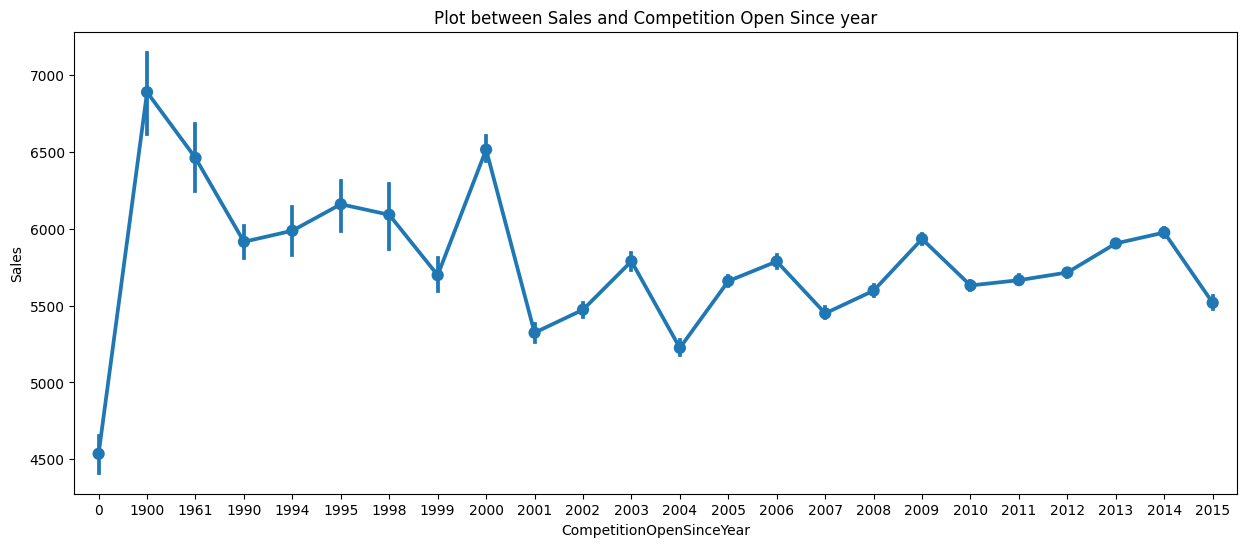

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=Full_Df)
plt.title('Plot between Sales and Competition Open Since year')

From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales and the sales start converging to the mean.

**Promo2**

<Axes: xlabel='Promo2', ylabel='count'>

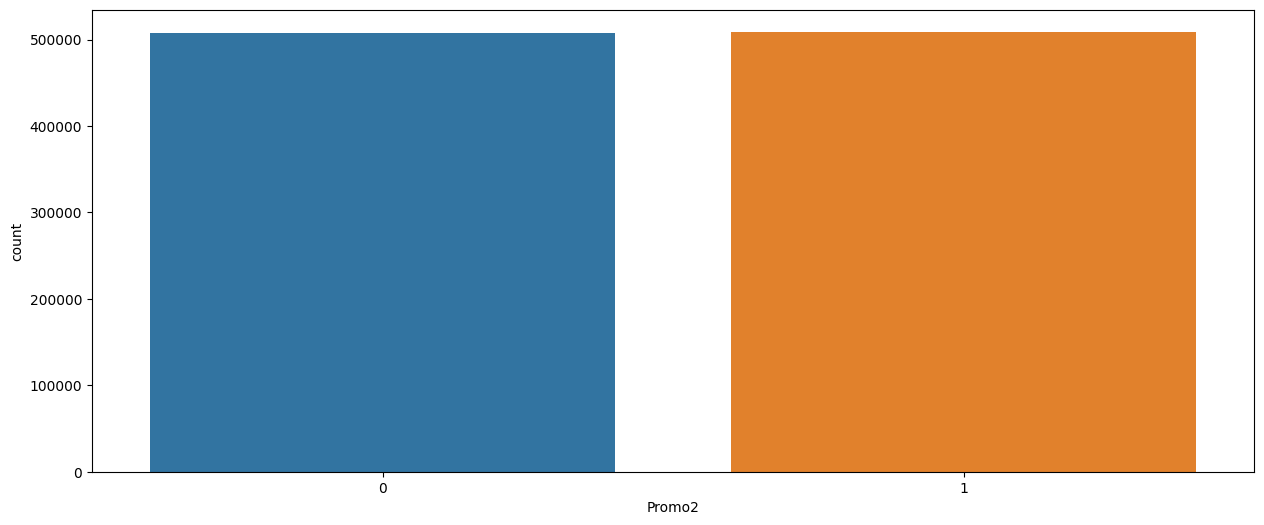

In [232]:
plt.figure(figsize=(15,6))
sns.countplot(x= 'Promo2', data=Full_Df)

Text(0.5, 1.0, 'Plot between Sales and Promo2')

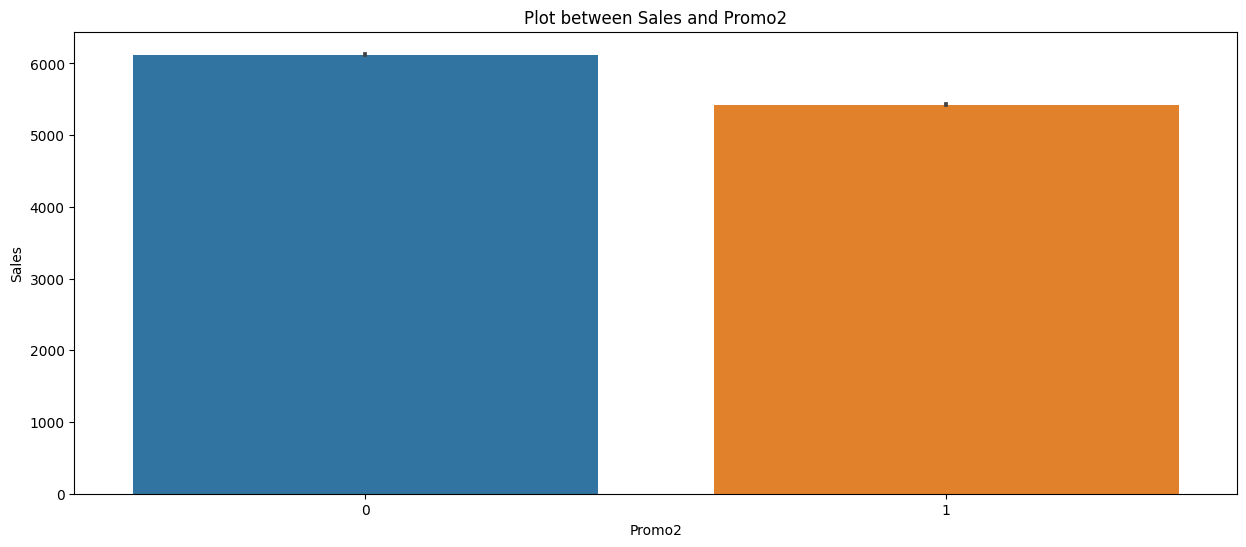

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x= 'Promo2', y= 'Sales', data=Full_Df)
plt.title('Plot between Sales and Promo2')

Half of the Stores are not running a continuous Promotion but the one that dont are bringing in more sales.

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

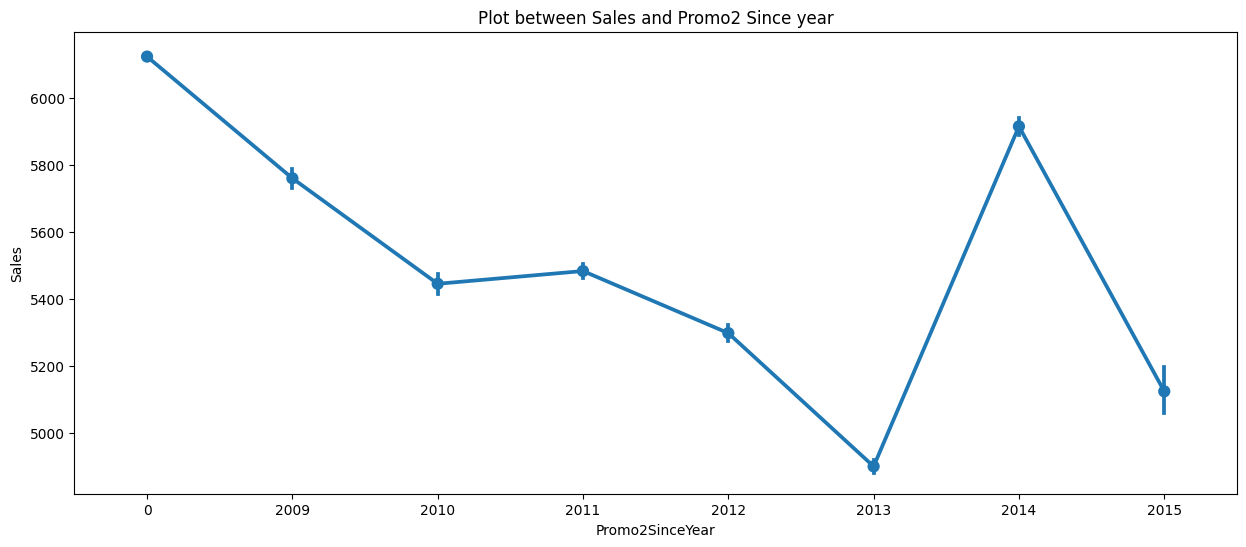

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=Full_Df)
plt.title('Plot between Sales and Promo2 Since year')

This data is available from year 2009 to 2015. Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

**DayOfWeek**

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

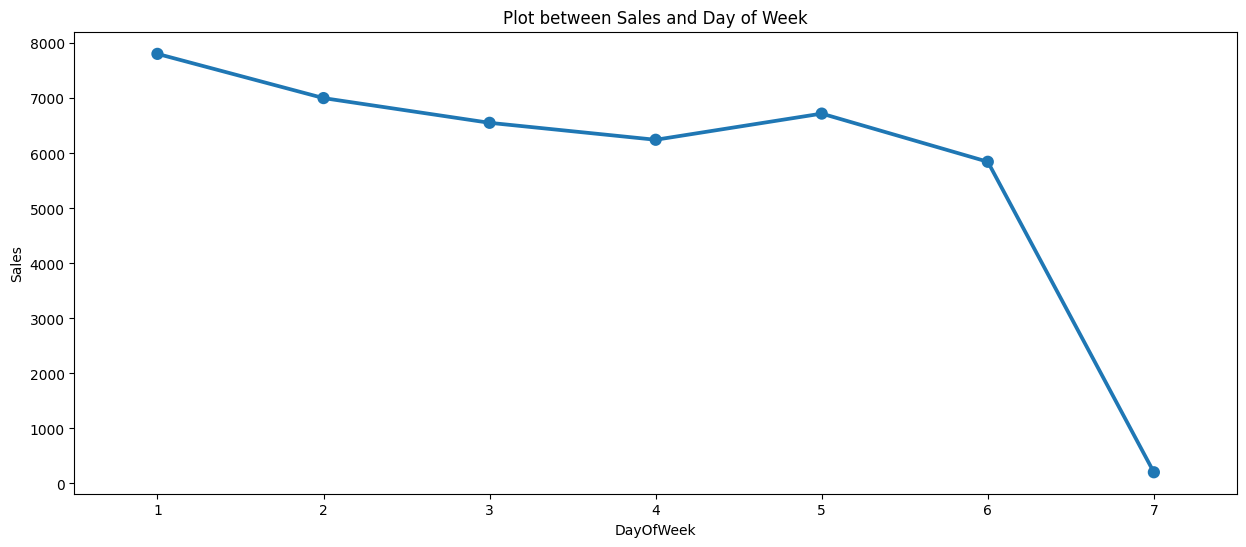

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=Full_Df)
plt.title('Plot between Sales and Day of Week')

Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.

**Holidays**

**SchoolHoliday**

Text(0.5, 1.0, 'Plot between Sales and Day of SchoolHoliday')

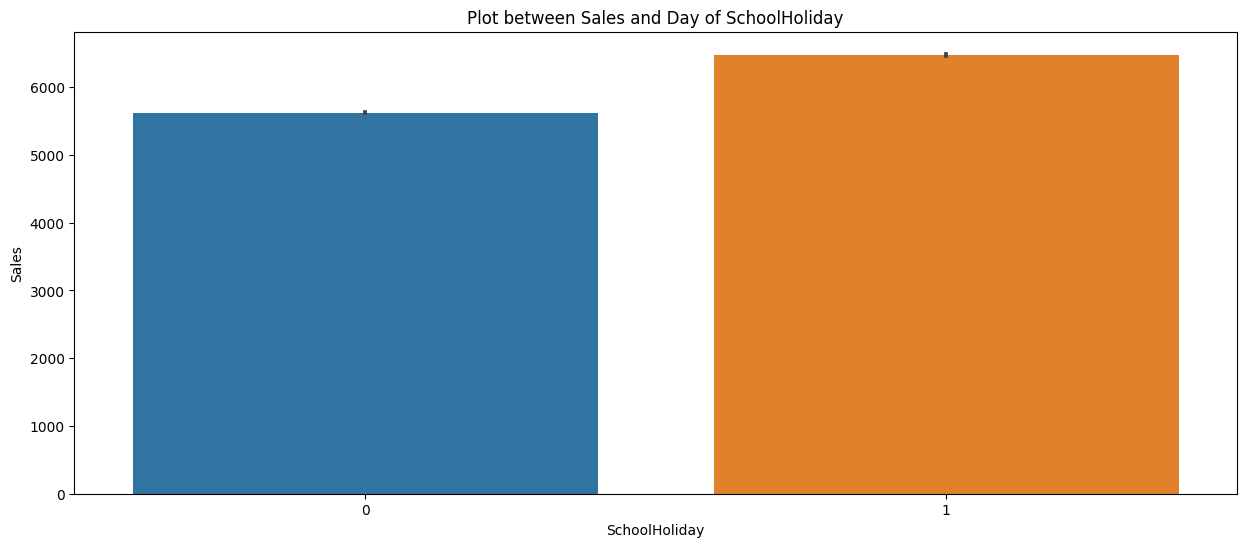

In [236]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df, x='SchoolHoliday',y ='Sales')
plt.title('Plot between Sales and Day of SchoolHoliday')

Text(0.5, 1.0, 'Plot between SchoolHoliday and Day of Customers')

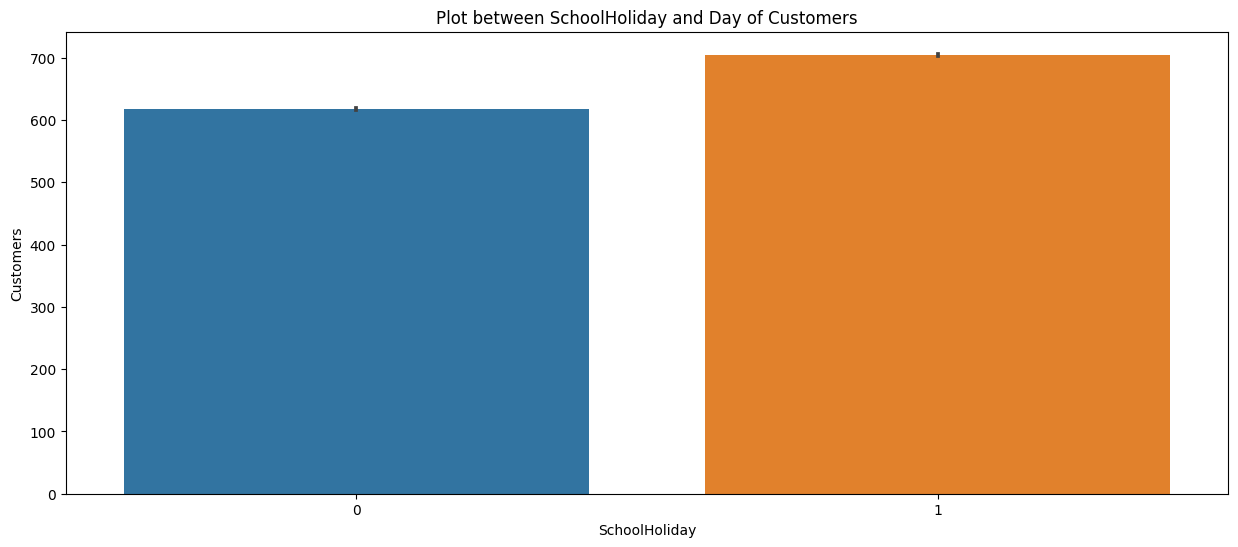

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df, x='SchoolHoliday',y ='Customers')
plt.title('Plot between SchoolHoliday and Day of Customers')

A large Chunck of sale and Customers comes in when there's a Schoolholiday.

**StateHoliday**

 a = public holiday, b = Easter holiday, c = Christmas, 0 = None

*   0 = None
*   a = public holiday
*   b = Easter holiday
*   c = Christmas

Text(0.5, 1.0, 'Plot between Sales and Day of StateHoliday')

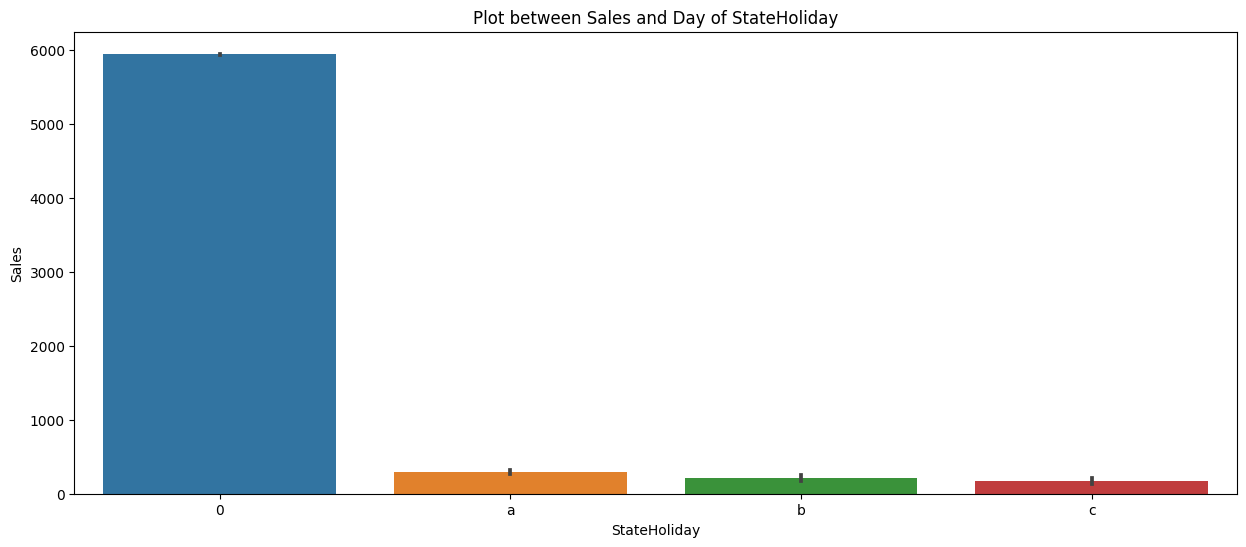

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df, x='StateHoliday',y ='Sales')
plt.title('Plot between Sales and Day of StateHoliday')

Text(0.5, 1.0, 'Plot between Customers and Day of StatelHoliday')

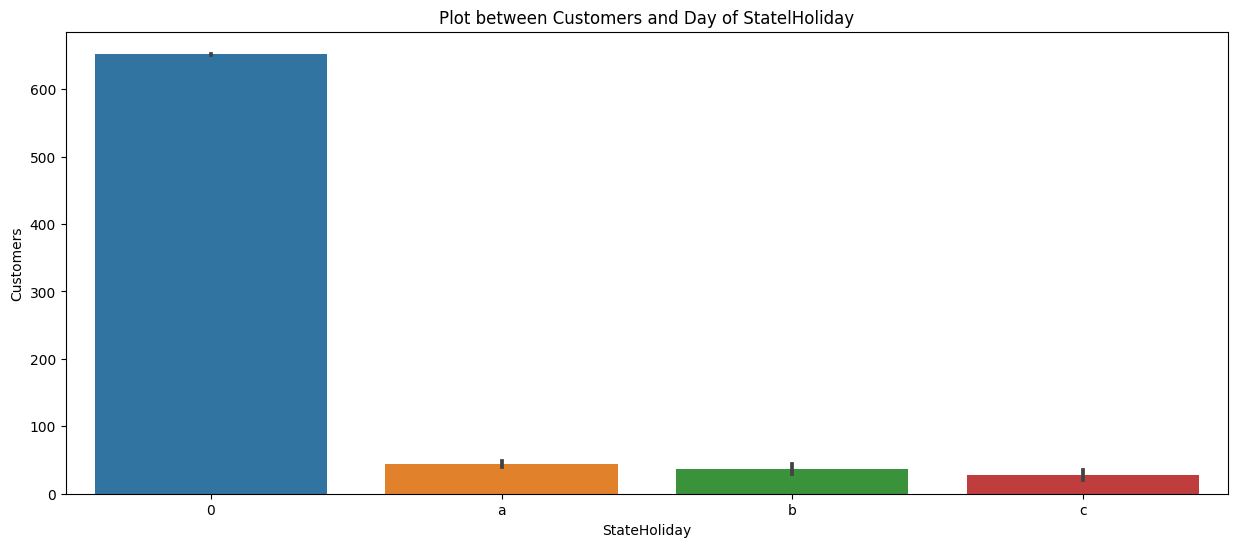

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(Full_Df, x='StateHoliday',y ='Customers')
plt.title('Plot between Customers and Day of StatelHoliday')

Most of the Customers and sales happen when theres no state holidays.

StateHoliday A derives the most customers and sales followed by B and C.

**Conclusion**

gcghk

# **Handeling Outliers**

We want to remove ouliers from

In [94]:
Columns = ['CompetitionDistance','Customers','Sales']

In [95]:
def Outliers_threshold_iqr(dataframe,col_name,th1 =0.25,th3=0.75):
  quartile1 =dataframe[col_name].quantile(th1)
  quartile3 =dataframe[col_name].quantile(th3)
  iqr = quartile3 - quartile1
  upper_limit = quartile3 + 1.5*iqr
  Lower_limit = quartile1 - 1.5*iqr
  return upper_limit,Lower_limit

In [96]:
Outliers_threshold_iqr(Full_Df,Columns)

(CompetitionDistance    16150.0
 Customers               1485.0
 Sales                  14049.5
 dtype: float64,
 CompetitionDistance   -8570.0
 Customers              -243.0
 Sales                 -2466.5
 dtype: float64)

Removing outliers

In [97]:
Full_Df.drop(Full_Df[(Full_Df.CompetitionDistance < -8570)].index ,axis = 0, inplace= True)

In [98]:
Full_Df.drop(Full_Df[(Full_Df.CompetitionDistance> 16150)].index ,axis = 0, inplace= True)

In [99]:
Full_Df.drop(Full_Df[(Full_Df.Customers < -243)].index ,axis = 0, inplace= True)

In [100]:
Full_Df.drop(Full_Df[(Full_Df.Customers> 1485)].index ,axis = 0, inplace= True)

In [101]:
Full_Df.drop(Full_Df[(Full_Df.Sales < -2467)].index ,axis = 0, inplace= True)

In [102]:
Full_Df.drop(Full_Df[(Full_Df.Sales> 14050)].index ,axis = 0, inplace= True)

In [103]:
Full_Df.shape

(874506, 20)

# **Feature Engineering**

Treating Catagorical Feature

In [104]:
Full_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874506 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Store                      874506 non-null  int64 
 1   DayOfWeek                  874506 non-null  int64 
 2   Date                       874506 non-null  int64 
 3   Month                      874506 non-null  int64 
 4   Year                       874506 non-null  int64 
 5   Customers                  874506 non-null  int64 
 6   Open                       874506 non-null  int64 
 7   Promo                      874506 non-null  int64 
 8   StateHoliday               874506 non-null  object
 9   SchoolHoliday              874506 non-null  int64 
 10  StoreType                  874506 non-null  object
 11  Assortment                 874506 non-null  object
 12  CompetitionDistance        874506 non-null  int64 
 13  CompetitionOpenSinceMonth  874506 non-null 

Dropping PromoInterval as it cant be converted into a Numeric feature

In [105]:
Full_Df.drop(['PromoInterval'], axis =1, inplace= True)

Converting StoreType into dummy veriable for regression

In [106]:
Full_Df = pd.get_dummies(Full_Df, columns = ['StoreType','Assortment','StateHoliday'], prefix =['StoreType','Assortment','StateHoliday'], drop_first= True)

In [107]:
Full_Df.head()

,Store,DayOfWeek,Date,Month,Year,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,...,Promo2SinceYear,Sales,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,31,7,2015,555,1,1,1,1270,...,0,5263,0,1,0,0,0,0,0,0
1,2,5,31,7,2015,625,1,1,1,570,...,2010,6064,0,0,0,0,0,0,0,0
2,3,5,31,7,2015,821,1,1,1,14130,...,2011,8314,0,0,0,0,0,0,0,0
5,6,5,31,7,2015,589,1,1,1,310,...,0,5651,0,0,0,0,0,0,0,0
7,8,5,31,7,2015,833,1,1,1,7520,...,0,8492,0,0,0,0,0,0,0,0


In [108]:
Full_Df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Month', 'Year', 'Customers', 'Open',
       'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Sales', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [109]:
Full_Df = Full_Df[['Store', 'DayOfWeek', 'Date', 'Month', 'Year', 'Customers', 'Open',
       'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'Sales']]

Feature Selection

In [110]:
Full_Df.corr()

,Store,DayOfWeek,Date,Month,Year,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,...,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
Store,1.000000,0.000683,0.000036,0.000810,0.000985,0.018707,-0.002202,-0.000635,0.000226,-0.035172,...,0.016049,-0.009791,0.066684,-0.045089,-0.017376,0.024901,0.001394,0.000310,0.000227,0.002704
DayOfWeek,0.000683,1.000000,0.003689,-0.000640,0.001472,-0.472812,-0.537669,-0.386992,-0.206117,-0.005301,...,-0.006109,0.003468,-0.002972,-0.005451,0.000863,0.002222,-0.044399,-0.043034,-0.002696,-0.501243
Date,0.000036,0.003689,1.000000,0.013254,-0.001942,-0.000042,0.035294,-0.107694,0.025951,-0.000775,...,-0.001585,0.000655,0.000012,-0.001176,0.000611,-0.000083,-0.102867,-0.025623,0.072400,-0.009032
Month,0.000810,-0.000640,0.013254,1.000000,-0.268476,0.023170,-0.004399,-0.014875,0.106597,0.002054,...,-0.025810,-0.002401,0.005491,-0.007694,-0.004757,0.006634,-0.025683,-0.049642,0.120987,0.030708
Year,0.000985,0.001472,-0.001942,-0.268476,1.000000,0.003659,-0.000589,0.024915,-0.037762,-0.001197,...,-0.005488,-0.009232,0.002946,-0.003290,-0.014441,0.001191,0.011362,0.017758,-0.031531,0.032256
Customers,0.018707,-0.472812,-0.000042,0.023170,0.003659,1.000000,0.757876,0.368967,0.081134,-0.111096,...,-0.121837,0.104770,0.067702,-0.156272,0.081869,-0.021983,-0.229692,-0.133161,-0.103486,0.911334
Open,-0.002202,-0.537669,0.035294,-0.004399,-0.000589,0.757876,1.000000,0.296149,0.086856,0.007484,...,0.004837,0.027985,-0.002755,0.005828,0.020803,-0.003332,-0.303914,-0.175994,-0.137167,0.760424
Promo,-0.000635,-0.386992,-0.107694,-0.014875,0.024915,0.368967,0.296149,1.000000,0.068252,0.005538,...,0.004666,-0.005459,0.002056,0.006228,-0.004904,-0.001891,-0.000788,0.022111,-0.049836,0.479841
SchoolHoliday,0.000226,-0.206117,0.025951,0.106597,-0.037762,0.081134,0.086856,0.068252,1.000000,-0.001154,...,-0.006701,0.003195,0.000720,0.000699,0.004861,-0.002973,0.030515,0.163962,0.139722,0.086165
CompetitionDistance,-0.035172,-0.005301,-0.000775,0.002054,-0.001197,-0.111096,0.007484,0.005538,-0.001154,1.000000,...,-0.029684,-0.044766,-0.102685,0.292217,-0.023338,0.197056,-0.001300,-0.001528,-0.001231,0.028204


<Axes: >

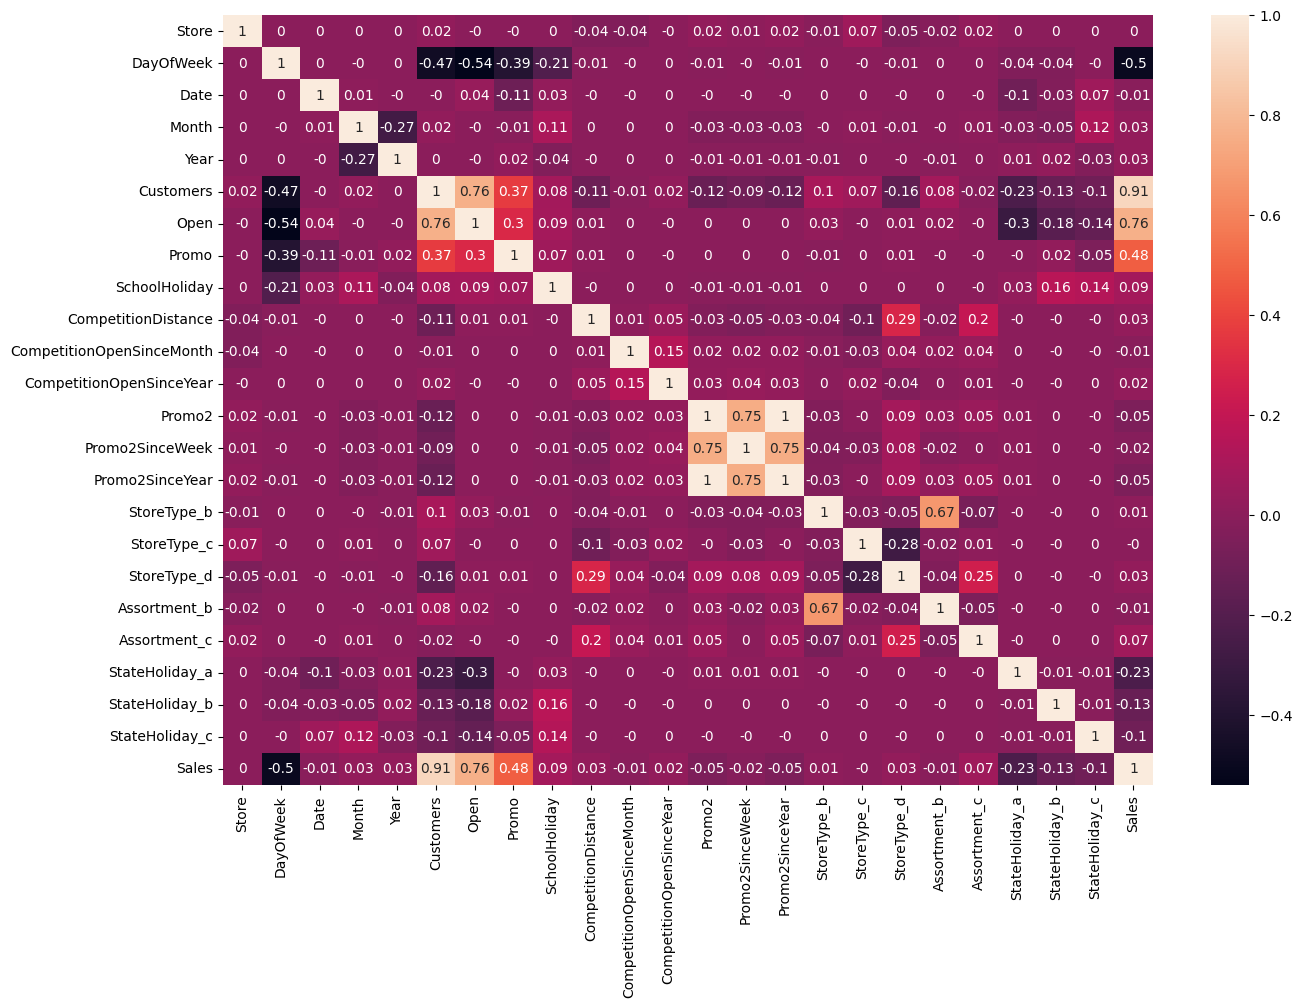

In [111]:
plt.figure(figsize= (15,10))
sns.heatmap(Full_Df.corr().round(2), annot= True)

In [112]:
Full_Df['Assortment_b'][Full_Df['Assortment_b'] == Full_Df['StoreType_b']].unique()

array([0, 1], dtype=uint8)

In [113]:
Full_Df['Assortment_b'][Full_Df['Assortment_b'] == Full_Df['StoreType_b']].value_counts()

0    868798
1      2562
Name: Assortment_b, dtype: int64

In [114]:
True_v_False=Full_Df['Assortment_b'][Full_Df['Assortment_b'] == Full_Df['StoreType_b']].value_counts()

In [115]:
Full_Df.shape

(874506, 24)

In [116]:
print((True_v_False[0]+ True_v_False[1])/Full_Df.shape[0])

0.996402540405669


StoreType_b explains 99.2% of Assotmernt_b values so we'll drop Assortment_b from the DataFrame

In [117]:
Full_Df.drop(['Assortment_b'],axis = 1,inplace=True)

Dropping Promo2SinceYear and Promo2SinceWeek because its highly Correlated with Prom2

In [118]:
Full_Df.drop(['Promo2SinceYear'],axis = 1,inplace=True)

In [119]:
Full_Df.drop(['Promo2SinceWeek'],axis = 1,inplace=True)

VIF

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
def Cal_Vif(x):
  Vif_data = pd.DataFrame()
  Vif_data['features'] = x.columns
  Vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return(Vif_data)

In [122]:
Cal_Vif(Full_Df[[i for i in Full_Df.describe().columns if i not in ['Sales']]])

,features,VIF
0,Store,3.999690
1,DayOfWeek,8.874446
2,Date,4.346139
3,Month,4.210060
4,Year,371.795571
5,Customers,10.484799
6,Open,17.695133
7,Promo,2.029795
8,SchoolHoliday,1.349860
9,CompetitionDistance,2.127799


StateHoliday_0, CompetitionOpenSinceMonth, DayOfWeek, Customers show vary high VIF value so we shall drop them

In [123]:
Cal_Vif(Full_Df[[i for i in Full_Df.describe().columns if i not in ['Sales','Year']]])

,features,VIF
0,Store,3.964761
1,DayOfWeek,8.366622
2,Date,4.303347
3,Month,4.176901
4,Customers,10.484799
5,Open,17.164273
6,Promo,2.019215
7,SchoolHoliday,1.349215
8,CompetitionDistance,2.126936
9,CompetitionOpenSinceMonth,8.951334


In [124]:
Cal_Vif(Full_Df[[i for i in Full_Df.describe().columns if i not in ['Sales','Year','CompetitionOpenSinceYear']]])

,features,VIF
0,Store,3.734893
1,DayOfWeek,4.909975
2,Date,4.014733
3,Month,3.943881
4,Customers,10.366591
5,Open,14.664846
6,Promo,1.967152
7,SchoolHoliday,1.344504
8,CompetitionDistance,2.083886
9,CompetitionOpenSinceMonth,7.339110


In [125]:
Cal_Vif(Full_Df[[i for i in Full_Df.describe().columns if i not in ['Sales','Year','CompetitionOpenSinceYear','Open']]])

,features,VIF
0,Store,3.692789
1,DayOfWeek,4.823401
2,Date,3.906395
3,Month,3.919115
4,Customers,4.553438
5,Promo,1.966572
6,SchoolHoliday,1.338237
7,CompetitionDistance,2.031686
8,CompetitionOpenSinceMonth,7.029728
9,Promo2,2.092514


'Year','CompetitionOpenSinceYear','Open' Dropping the afermentioned features as they were highly multicollinear

In [126]:
Full_Df.drop(['Year','CompetitionOpenSinceYear','Open'], axis = 1, inplace=True)

In [127]:
Full_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874506 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Store                      874506 non-null  int64
 1   DayOfWeek                  874506 non-null  int64
 2   Date                       874506 non-null  int64
 3   Month                      874506 non-null  int64
 4   Customers                  874506 non-null  int64
 5   Promo                      874506 non-null  int64
 6   SchoolHoliday              874506 non-null  int64
 7   CompetitionDistance        874506 non-null  int64
 8   CompetitionOpenSinceMonth  874506 non-null  int64
 9   Promo2                     874506 non-null  int64
 10  StoreType_b                874506 non-null  uint8
 11  StoreType_c                874506 non-null  uint8
 12  StoreType_d                874506 non-null  uint8
 13  Assortment_c               874506 non-null  uint8
 14  Sta

now we shall remove rows which have zero sales to ease up the Modeling

In [128]:
Full_Df[(Full_Df.Sales == 0)].shape

(156751, 18)

In [129]:
Full_Df.drop(Full_Df[(Full_Df.Sales == 0)].index ,axis = 0, inplace= True)

In [130]:
Full_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717755 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Store                      717755 non-null  int64
 1   DayOfWeek                  717755 non-null  int64
 2   Date                       717755 non-null  int64
 3   Month                      717755 non-null  int64
 4   Customers                  717755 non-null  int64
 5   Promo                      717755 non-null  int64
 6   SchoolHoliday              717755 non-null  int64
 7   CompetitionDistance        717755 non-null  int64
 8   CompetitionOpenSinceMonth  717755 non-null  int64
 9   Promo2                     717755 non-null  int64
 10  StoreType_b                717755 non-null  uint8
 11  StoreType_c                717755 non-null  uint8
 12  StoreType_d                717755 non-null  uint8
 13  Assortment_c               717755 non-null  uint8
 14  Sta

# **Scaling**

Splitng data ito Target and Indpendent Data_frames

In [141]:
Target_Df = Full_Df['Sales']

In [142]:
Predictor_Df =Full_Df.drop('Sales',axis= 1)

In [143]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
Predictor_Df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Month', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'Promo2', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_c',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [145]:
columns = ['Store', 'DayOfWeek', 'Date', 'Month', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'Promo2', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_c',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c']

In [146]:
Scale = MinMaxScaler(feature_range = (0,1))

In [147]:
Scaled = Scale.fit_transform(Predictor_Df)

In [148]:
Predictor_Df = pd.DataFrame(Scaled, columns = columns)

In [149]:
Predictor_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717755 entries, 0 to 717754
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      717755 non-null  float64
 1   DayOfWeek                  717755 non-null  float64
 2   Date                       717755 non-null  float64
 3   Month                      717755 non-null  float64
 4   Customers                  717755 non-null  float64
 5   Promo                      717755 non-null  float64
 6   SchoolHoliday              717755 non-null  float64
 7   CompetitionDistance        717755 non-null  float64
 8   CompetitionOpenSinceMonth  717755 non-null  float64
 9   Promo2                     717755 non-null  float64
 10  StoreType_b                717755 non-null  float64
 11  StoreType_c                717755 non-null  float64
 12  StoreType_d                717755 non-null  float64
 13  Assortment_c               71

In [150]:
Target_Df.info()

<class 'pandas.core.series.Series'>
Int64Index: 717755 entries, 0 to 1017190
Series name: Sales
Non-Null Count   Dtype
--------------   -----
717755 non-null  int64
dtypes: int64(1)
memory usage: 11.0 MB


# **Modeling**

In [152]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

we'll make 3 test data sets one linear 2nd a Polynomial with degree 2 and 3rd with degree 3 

In [153]:
x_train, x_test, y_train, y_test = train_test_split(Predictor_Df, Target_Df, test_size=0.3, random_state=0)

**LInear Regression**

In [ ]:
LR=LinearRegression()

In [ ]:
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
LR.score(x_train,y_train)

0.7863814102038112

In [ ]:
LR.coef_

array([  -85.51199402,   -72.47593418,    43.79042722,   188.4165995 ,
       11544.55544099,  1010.43320494,    18.01479333,  1244.72124054,
        -116.54379805,   304.17266853, -2991.84057603,  -222.96674006,
        1059.8390074 ,   264.22017206,  -277.21488628,  -339.07471334,
        1284.61017484])

In [ ]:
LR.intercept_

-103.73112268252498

In [ ]:
LR_test_Pred=LR.predict(x_test)

In [ ]:
LR_train_Pred =LR.predict(x_train)

Valuation for train data 

In [ ]:
MAE_Train_LR = mean_absolute_error(y_train,LR_train_Pred)
print('Absolute mean error for Training Data:', MAE_Train_LR)

MSE_Train_LR = mean_squared_error(y_train,LR_train_Pred)
print('Mean Squared error for Training Data:', MSE_Train_LR)

RMSE_Train_LR = np.sqrt(MSE_Train_LR)
print('Root mean squared error for Training Data:',RMSE_Train_LR)

Absolute mean error for Training Data: 837.2542471544272
Mean Squared error for Training Data: 1180913.1153404592
Root mean squared error for Training Data: 1086.6982632453496


In [ ]:
r2_Train_LR = r2_score(y_train,LR_train_Pred)
print("R2 :" ,r2_Train_LR)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.7863814102038112


Valuation for Test Data

In [ ]:
MAE_Test_LR = mean_absolute_error(y_test,LR_test_Pred)
print('Absolute mean error for Testing Data:', MAE_Test_LR)

MSE_Test_LR = mean_squared_error(y_test,LR_test_Pred)
print('Mean Squared error for Testing Data:', MSE_Test_LR)

RMSE_Test_LR = np.sqrt(MSE_Train_LR)
print('Root mean squared error for Testing Data:',RMSE_Test_LR)

Absolute mean error for Testing Data: 835.7360546479256
Mean Squared error for Testing Data: 1179382.4911411493
Root mean squared error for Testing Data: 1086.6982632453496


In [ ]:
r2_Test_LR = r2_score(y_test,LR_test_Pred)
print("R2 :" ,r2_Test_LR)

R2 : 0.7856225423814401


**Lasso**

In [ ]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(x_train, y_train)

0.7863814101329794

In [ ]:
lasso.coef_

array([  -85.51083381,   -72.47514808,    43.78970618,   188.41652573,
       11544.54972314,  1010.43319069,    18.01430621,  1244.71912541,
        -116.54174994,   304.17187473, -2991.82404598,  -222.96580472,
        1059.83872738,   264.22011765,  -277.02124597,  -337.07291978,
        1282.92152817])

In [ ]:
lasso.intercept_

-103.72957206747287

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-13}

Using  {'alpha': 1e-13}  the negative mean squared error is:  -1181036.7467983975


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)

MSE : 1179382.491141149
RMSE : 1085.9937804339163
R2 : 0.7856225423814401


**Ridge**

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -1181036.6166585851


In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)

MSE : 1179381.813618848
RMSE : 1085.9934684973239
R2 : 0.785622665535302


ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(x_train, y_train)

0.5192727792623797

In [ ]:
y_pred_en = elasticnet.predict(x_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)

MSE : 2650841.5598695497
RMSE : 1628.1405221508214
R2 : 0.5181540522917265


In [154]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [155]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("Using ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.8}
Using  {'alpha': 1e-05, 'l1_ratio': 0.8}  the negative mean squared error is:  -1181036.6030519272


In [156]:
y_pred_elastic = elastic_regressor.predict(x_test)

In [157]:
MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)

MSE : 1179381.8051646405
RMSE : 1085.9934646049398
R2 : 0.7856226670720312
